In [54]:
import cv2
import matplotlib.pyplot as plt
from preprocess_images import apply_circular_mask
import numpy as np

In [2]:
img = cv2.imread("data/dark.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

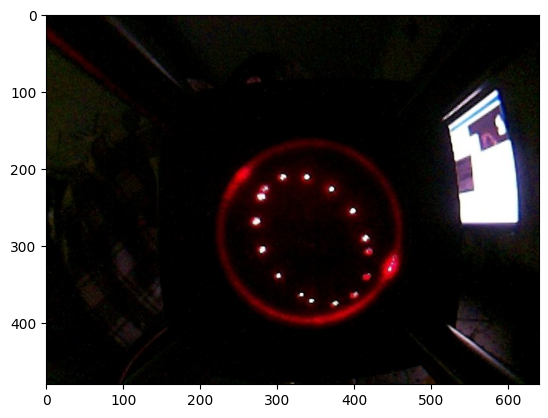

In [3]:
plt.imshow(img)
plt.show()

In [55]:
def to_square(img, t_x, t_y, b_x, b_y):
    h, w = img.shape[:2]
    m_x = w//2 + b_x
    m_y = h//2 + b_y
    return img[m_y-t_y//2:m_y+t_y//2,m_x-t_x//2:m_x+t_x//2]  

def high_pass(img, t):
    new = np.copy(img)
    new[img<t] = 0
    return new

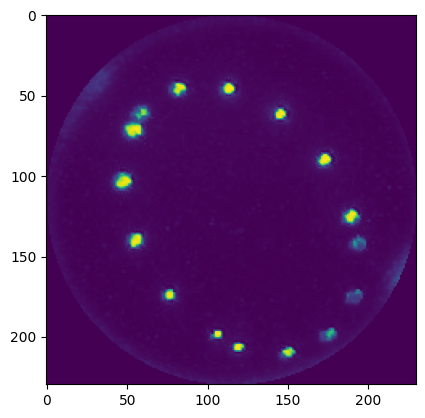

In [56]:
masked = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
r = 230
masked = to_square(masked, t_x=r, t_y=r, b_x=20, b_y=40)
masked = apply_circular_mask(masked)
# plt.imshow(masked, cmap='gray')
plt.imshow(masked)
plt.show()

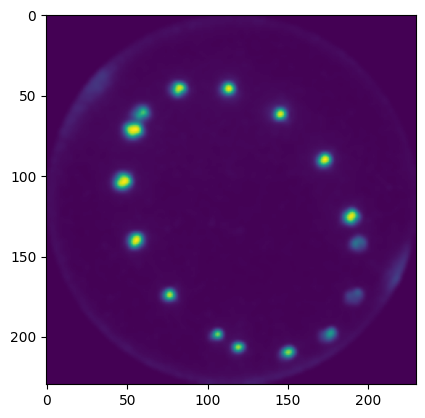

In [114]:
blurred = cv2.GaussianBlur(masked, (7,7), 0)
plt.imshow(blurred)
plt.show()

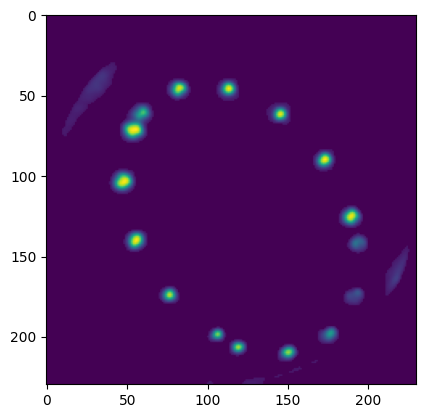

In [115]:
filtered = high_pass(blurred, 15)
plt.imshow(filtered)
plt.show()

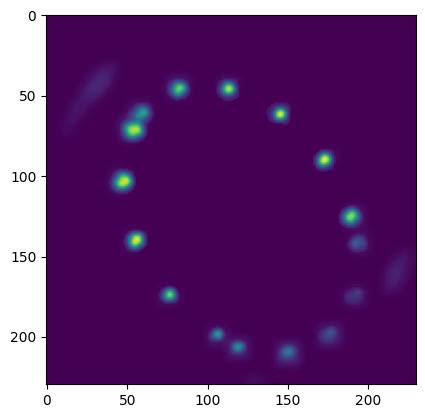

In [128]:
blurred = cv2.GaussianBlur(filtered, (15, 15), 9)  # Adjust kernel size for effect
h, w = filtered.shape
# Create a vignette mask (circular gradient)
y, x = np.ogrid[:h, :w]
center_x, center_y = w // 2, h // 2
radius = w // 2 + 7 # Radius of circular blur 
distance = np.sqrt((x - center_x) ** 2 + (y - center_y) ** 2)

# Normalize distance to range [0,1] (0 at center, 1 at edges)
mask = np.clip((distance - (0.5 * radius)) / (0.5 * radius), 0, 1)

# Blend original and blurred images using the mask
result = (filtered * (1 - mask) + blurred * mask).astype(np.uint8)
plt.imshow(result)
plt.show()

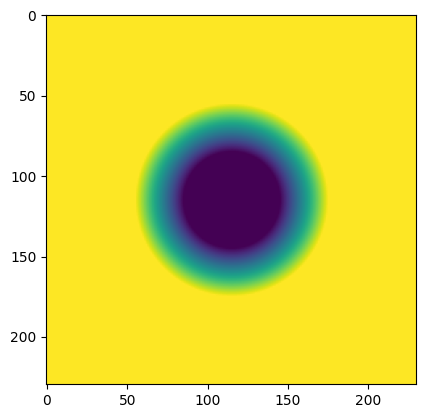

In [121]:
plt.imshow(mask)
plt.show()